Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот теоритический курс лекци: https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что правильно использованы train/valid/test наборы.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Тебе удалось добиться очень хорошего качества, поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Рекомендация тарифов

**Описание проекта**

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

Инструкция по выполнению проекта

- Откройте файл с данными и изучите его. Путь к файлу: /datasets/users_behavior.csv.
- Разделите исходные данные на обучающую, валидационную и тестовую выборки.
- Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.
- Проверьте качество модели на тестовой выборке.
- **Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.**

Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Откройте и изучите файл

### Загрузка модулей и библиотек

Начнем работу с загрузки необходимых модулей и библиотек для работы, также настроим рабочую среду для более комфортной работы.


Для начала надо определиться с типом решаемой задачи и под нее уже выбрать инструменты для работы. Нам необходимо предсказать по поведению клиентов (т.е. по кол-ву совершенных звонков, отправленных СМС и израсходованному интернет-трафику) наилучший тариф - **Ультра** или **Смарт**. Получается мы имеем дело с задачей классификации.

Моделями для обучения и работы будут 3 пройденные в рамках курса: **DecisionTreeClassifier**, **RandomForestClassifier**, **LogisticRegression**.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
font = {'family': 'monospace',
        'color':  '#000000',
        'weight': 'bold',
        'size': 14,
        }

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно, чтобы все импорты были собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> В верхней части это еще выше? 
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Нет, у тебя просто не все импорты.
</div>

### Загрузка и оценка данных

Теперь можно открыть набор данных и изучить его.

In [5]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,"3,214.00","3,214.00","3,214.00","3,214.00","3,214.00"
mean,63.04,438.21,38.28,"17,207.67",0.31
std,33.24,234.57,36.15,"7,570.97",0.46
min,0.00,0.00,0.00,0.00,0.00
25%,40.00,274.58,9.00,"12,491.90",0.00
50%,62.00,430.60,30.00,"16,943.24",0.00
75%,82.00,571.93,57.00,"21,424.70",1.00
max,244.00,"1,632.06",224.00,"49,745.73",1.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [8]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.00,311.90,83.00,"19,915.42",0
1,85.00,516.75,56.00,"22,696.96",0
2,77.00,467.66,86.00,"21,060.45",0
3,106.00,745.53,81.00,"8,437.39",1
4,66.00,418.74,1.00,"14,502.75",0


In [9]:
df.tail()

,calls,minutes,messages,mb_used,is_ultra
3209,122.00,910.98,20.00,"35,124.90",1
3210,25.00,190.36,0.00,"3,275.61",0
3211,97.00,634.44,70.00,"13,974.06",0
3212,64.00,462.32,90.00,"31,239.78",0
3213,80.00,566.09,6.00,"29,480.52",1


In [10]:
df.sample(5)

,calls,minutes,messages,mb_used,is_ultra
749,69.00,430.50,9.00,"10,460.90",0
740,69.00,456.26,39.00,"15,289.84",0
503,118.00,726.13,27.00,"22,022.28",1
3155,64.00,431.79,14.00,"14,675.42",0
1819,125.00,897.35,0.00,"38,910.01",1


In [11]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [12]:
df.duplicated().sum()

0

**Вывод**

Как говорится, доверяй, но проверяй. Действительно имеем подготовленный набор данных, не требующий дополнительной предобработки. Все столбцы содержат данные без пропусков, повторов и в верных форматах данных.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен.
</div>

## Разбейте данные на выборки

Проведем разделение данных на выборки для обучения модели, валидации, тестирования. Соовтетственно нам нужно разделить исходный набор данных в соотношении 3:1:1. Но сначала выделим из всех признаков целевой и запишем его в отдельный набор данных. Целевой признак в нашей задаче - столбец **is_ultra**; вынесем его отдельно от остальных признаков.

In [13]:
features = df.drop(['is_ultra'], axis = 1)
target = df['is_ultra']

In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 4 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
dtypes: float64(4)
memory usage: 100.6 KB


In [15]:
target.shape

(3214,)

Для удобства, зададим переменные для гиперпараметров и значение **random_state** в одной ячейке, чтобы можно было всегда их быстро подправить во всем коде.

In [16]:
seed = 140593 #Значение для random_state
n_estimators = 100 #Значение для контроля количества деревьев в случайном лесу
depth = 5 #Значение для контроля высоты решающего дерева

Теперь можно приступить к разделению данных на обучающую, валидационную и тестовую выборки. Поскольку "спрятанной" тестовой выборки у нас нет, то разделение выполним в 2 этапа: разделим данные на обучающую и вадидационно-тестовую выборки в соотношении 4:6; 60% данных станут обучающей выборкой, остальные 40% будут валидационно-тестовой, затем разделим валидационно-тестовую выборку пополам, что в результате даст: 60% обучающей выборки, 20% валидационной и 20% тестовой выборки от исходного набора данных.

In [17]:
features_training, features_test_valid, target_training, target_test_valid = train_test_split(features, target,
                                                                              test_size=0.4,
                                                                              random_state=seed)
features_test, features_valid, target_test, target_valid = train_test_split(features_test_valid, target_test_valid,
                                                                              test_size=0.5,
                                                                              random_state=seed)

In [18]:
features_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 913 to 1965
Data columns (total 4 columns):
calls       1928 non-null float64
minutes     1928 non-null float64
messages    1928 non-null float64
mb_used     1928 non-null float64
dtypes: float64(4)
memory usage: 75.3 KB


In [19]:
features_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2443 to 754
Data columns (total 4 columns):
calls       643 non-null float64
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
dtypes: float64(4)
memory usage: 25.1 KB


In [20]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 766 to 1911
Data columns (total 4 columns):
calls       643 non-null float64
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
dtypes: float64(4)
memory usage: 25.1 KB


In [21]:
target_training

913     1
390     1
1648    1
2124    0
1368    1
       ..
1969    0
2885    1
288     0
1318    1
1965    0
Name: is_ultra, Length: 1928, dtype: int64

In [22]:
target_valid

2443    1
1440    0
211     0
411     0
560     0
       ..
2960    1
1801    0
601     0
1309    0
754     0
Name: is_ultra, Length: 643, dtype: int64

In [23]:
target_test

766     0
2994    0
2507    0
3210    0
767     0
       ..
410     0
1149    1
1280    1
2025    0
1911    0
Name: is_ultra, Length: 643, dtype: int64

In [24]:
1928+643+643

3214

In [25]:
(1928/3214)+(643/3214)+(643/3214)

1.0

**Вывод**

Немного топорная проверка (заказчикам такое лучше не показывать), но все сошлось обратно к 100%, значит разделение на обучающую, валидационную и тестовую выборки проведено корректно. Можно приступать к обучению моделей и настройке.

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано правильно. Радует, что была реализована проверка корректности разбиения!
</div>

## Исследуйте модели

### Инициализация "дефолтных" моделей

Начнем работу с моделями с дефолтных гиперпараметров, задав только seed для random_state, оценим их работу через параметр **accuracy**.

Для создания компактного и удобного для запуска Workflow по обучению модели добавим каждую из моделей в список, к которому затем будем обращаться при настройке моделей.

In [26]:
models = []
models.append(('DTC', DecisionTreeClassifier(random_state = seed)))
models.append(('RF', RandomForestClassifier(random_state = seed)))
models.append(('LR', LogisticRegression(random_state = seed)))

Для проверки качества модели будем использовать метрику **accuracy**, напишем цикл для совместного расчета всех вариантов модели, с выводом только оценки модели на тренировочных и валидационных данных.

In [27]:
scores = []
names = []
predictions = []
msg_row = []
for name, model in models:
    names.append(name)
    m_fit = model.fit(features_training, target_training)
    m_predict = model.predict(features_valid)
    predictions.append(m_predict)
    m_score = accuracy_score(target_valid,m_predict)
    scores.append(m_score)
    msg = "%s: valid = %.3f" % (name, m_score)
    msg_row.append(msg)
    print(msg)

DTC: valid = 0.715
RF: valid = 0.784
LR: valid = 0.750


Случайный лес вырывается вперед. Попробуем теперь отдельно поработать с каждой моделью и поварьировать гиперпараметры по отдельности.

### Дерево решений

Поработаем с деревом решений, поменяв в нем гиперпараметр отвечающий за максимальную высоту.

In [28]:
max_depth_DTC = []
score_DTC = []

for depth in range(1, 20):
    model_DTC = DecisionTreeClassifier(random_state=seed, max_depth=depth)
    model_DTC.fit(features_training, target_training)
    predictions_valid = model_DTC.predict(features_valid)
    m_score = accuracy_score(target_valid,predictions_valid)
    max_depth_DTC.append(depth)
    score_DTC.append(m_score)
    msg = "max_depth = %s: score = %.3f" % (depth, m_score)
    #print(msg)
best_DTC_scores = pd.DataFrame(list(zip(score_DTC, max_depth_DTC)),
               columns =['score','depth'])

In [29]:
best_DTC_scores.sort_values(by = 'score', ascending = False).head(1)

,score,depth
3,0.80,4


<div class="alert alert-block alert-success">
<b>Успех:</b> Подбор парамтеров был сделан верно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно собирать все результаты полученные во время настройки парамтеров в одну таблицу/список, а затем выбирать лучший параметр с помощью функции max.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> По сути почти сделал это изначально, собрал из двух списков таблицу и сделал по ней вывод лучшего балла модели
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

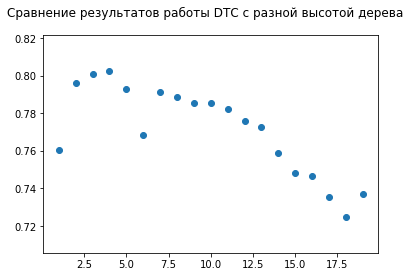

In [30]:
fig = pyplot.figure()
fig.suptitle('Сравнение результатов работы DTC с разной высотой дерева')
pyplot.scatter(x = max_depth_DTC, y = score_DTC)
pyplot.show()

Больше не значит лучше, высота дерева решений равная 4м показывает лучшее значение **accuracy** на валидационной выборке.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошая визуализация!
</div>

### Случайный лес

Теперь попробуем поварьировать гиперпараметры в случайном лесу. По дефолту в лесу содержится 100 деревьев, попробуем добавить их количество, одновременно меняя высоту деревьев. Идея сделать стресс-тест модели, чтобы найти точку перегиба, когда количество уже не влияет на качество модели.

In [31]:
#%%timeit
scores_rf = []
est_rf = []
depth_rf = []
for est in range(1, 200):
    for depth in range(1, 20):
        model_RF = RandomForestClassifier(random_state=seed, n_estimators=est, max_depth = depth)
        model_RF.fit(features_training, target_training)
        predictions = model_RF.predict(features_valid)
        m_score = model_RF.score(features_valid, target_valid)
        scores_rf.append(m_score)
        est_rf.append(est)
        depth_rf.append(depth)
        msg = "est = %s, max_depth = %s: valid = %.3f" % (est, depth, m_score)
        #print(msg)
        
best_rf_scores = pd.DataFrame(list(zip(scores_rf, est_rf,depth_rf )),
               columns =['score', 'est', 'depth'])

In [32]:
best_rf_scores.sort_values(by = 'score', ascending = False).head(1)

,score,est,depth
692,0.83,37,9


Лучшее значение accuracy для модели случайного леса 0.83 получено при количестве деревьев 37, с высотой 9.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что подобрал несколько разных параметров!
</div>

### Логистическая регрессия

Для модели логистической регрессии попробуем поварьировать параметр **solver**.

In [33]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    model_LR = LogisticRegression(random_state = seed, solver = solver)
    model_LR.fit(features_training, target_training) 
    m_score = model_LR.score(features_valid, target_valid)
    msg = "Solver = %s: valid = %.3f" % (solver, m_score)
    print(msg)

Solver = newton-cg: valid = 0.757
Solver = lbfgs: valid = 0.757
Solver = liblinear: valid = 0.750
Solver = sag: valid = 0.698
Solver = saga: valid = 0.698


Логистическя регрессия показывает лучшие результаты при гиперпараметре Solver newton-cg и lbfgs.

**Вывод**

В результате настройки моделей и подбора гиперпараметров, удалось получить наивысший балл accuracy в модели RandomForest с гиперпараметрами est = 37 и max_depth = 9.

<div class="alert alert-block alert-success">
<b>Успех:</b> Этот шаг был сделан отлично!
</div>

## Проверьте модель на тестовой выборке

Выполним проверку модели на тестовой выборке.

In [34]:
model_RF = RandomForestClassifier(random_state=seed, n_estimators=37, max_depth = 9)
model_RF.fit(features_training, target_training)
predictions = model_RF.predict(features_test)
m_score = model_RF.score(features_test, target_test)
msg = "est = %s, max_depth = %s: test = %.3f" % (37, 9, m_score)
msg

'est = 37, max_depth = 9: test = 0.815'

**Вывод**

На тестовой выборке удалось получить точность модели равную 0.815, т.е. условие, поставленное в задаче, выполнено.

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование реализовано абсолютно верно!
</div>

## (бонус) Проверьте модели на адекватность

Для проверки модели на адекватность воспользуемся Dummy Classifier c параметром Strategy mostfrequent, т.е. если оценка нашей настроенной модели будет выше, чем оценка у Dummy Classifier, который в данном случае работает как рандомный угадыватель самого частого значения (0, тариф Смарт), то значит наша модель работает адекватно.

In [35]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_training, target_training)
DummyClassifier (strategy = "most_frequent", random_state = seed)
dummy_clf.predict(features_test)
dummy_clf.score(features_test, target_test)

0.7091757387247278

Результаты Dummy Classifier показывают более низкий балл, чем результаты настроенной модели Random Forest, значит можно сделать вывод, что модель работает адекватно.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что здесь использовалась готовая дамми модель!
</div>

## Выводы

В работе были рассмотрены 3 модели машинного обучения:
- Decision Tree Classifier
- Random Forest Classifier 
- Logostic Regression

По результатам обучения и подбора гиперпараметров, наивысший балл **accuacy** был получен для модели Random Forest Classifier.

При проверке модели на тестовой выборке значение **accuracy** равно 0.81 у обученной модели.

При проверки на адекватность по сравнению с Dummy Classifier обученная модель показывает лучший результат.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть выводы в конце проекта!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
